### Problem Statement:
Predict the income class based on certain attributes of individuals.
i.e. Less than or equal to 50K and Greater than 50K

In [1]:
## Import Packages
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
column_list = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
               'marital-status', 'occupation', 'relationship', 'race', 'sex', 
               'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 
               'income']

train_raw_data = pd.read_csv("adult/adult.data", names=column_list)

In [3]:
train_raw_data.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


### Exploratory Data Analysis
<ol>
    <li>Getting to know data.</li>
    <li>Data preprocessing (Missing values)</li>
    <li>Cross tables and data visualization</li>
</ol>

In [4]:
data = train_raw_data.copy()
data['income'] = data['income'].apply(lambda x: x.strip())
# check data types of all variables present in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# Drop 'fnlwgt' variable because don't know about it and use of it according to variable table
data = data.drop(columns=['fnlwgt'])
# Drop 'education-num' because it is just label encoding of education variable
data = data.drop(columns=['education-num'])

In [6]:
# check missing values
data.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

No Missing values according null check!

In [7]:
# Summary of numerical variables
statistical_summary = data.describe()
print(statistical_summary)

                age  capital-gain  capital-loss  hours-per-week
count  32561.000000  32561.000000  32561.000000    32561.000000
mean      38.581647   1077.648844     87.303830       40.437456
std       13.640433   7385.292085    402.960219       12.347429
min       17.000000      0.000000      0.000000        1.000000
25%       28.000000      0.000000      0.000000       40.000000
50%       37.000000      0.000000      0.000000       40.000000
75%       48.000000      0.000000      0.000000       45.000000
max       90.000000  99999.000000   4356.000000       99.000000


Points to be note down after analysing above table for Numerical Variable Statistical Summary:
<ol>
    <li>Average age of individuals are 38.5 years and 75% of individuals having age less than 48 years.</li>
    <li>According to education-num, average level of education is around 10.</li>
    <li>Most of the individuals having 0 capital-gain means very few people investing in stocks and related schemes. Similarly for capital-loss as well.</li>
    <li>Individuals working for an average of 40 hours per week. But there are few people who are giving 99 hours in a week to work. There are possible case of wrong entry as 99.</li>
</ol>

In [8]:
# Summary of categorical variables
statistical_summary = data.describe(include="O")
print(statistical_summary)

       workclass education       marital-status       occupation relationship  \
count      32561     32561                32561            32561        32561   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22696     10501                14976             4140        13193   

          race    sex  native-country income  
count    32561  32561           32561  32561  
unique       5      2              42      2  
top      White   Male   United-States  <=50K  
freq     27816  21790           29170  24720  


Points to be note down after analysing above table for Categorical Variable Statistical Summary:
<ol>
    <li>Most of the individuals doing Private job which corresponds to 22696 out of 32561.</li>
    <li>High Secondary graduates (HS-grad) are highest according to data among all other level of education.</li>
    <li>White race or Male individuals are dominating in this data which may be problem of biasness towards one category.</li>
    <li>US individuals are present mostly around 90%</li>
</ol>

#### Univariate analysis
##### 1. workclass

In [9]:
### Frequency of each categories
data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [10]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

Here, we can see that there are missing values present with ' ?' value.

In [11]:
# replace ' ?' with null and remove forward space in each value
replacement_values = {
    ' State-gov': 'State-gov', ' Self-emp-not-inc': 'Self-emp-not-inc', 
    ' Private': 'Private', ' Federal-gov': 'Federal-gov', ' Local-gov': 'Local-gov', 
    ' ?': np.nan, ' Self-emp-inc': 'Self-emp-inc', ' Without-pay': 'Without-pay', ' Never-worked': 'Never-worked'
}
data['workclass'] = data['workclass'].replace(replacement_values)
### Frequency of each categories
data['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

##### 2. education

In [12]:
print(data['education'].value_counts())

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64


In [13]:
data['education'].unique(), len(data['education'].unique())

(array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
        ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
        ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
        ' Preschool', ' 12th'], dtype=object),
 16)

Total 16 kind of educational level categories are present.

In [14]:
# remove spaces in each value
data['education'] = data['education'].apply(lambda x: x.strip())

#### 3. marital-status

In [15]:
data['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [16]:
data['marital-status'].unique(), len(data['marital-status'].unique())

(array([' Never-married', ' Married-civ-spouse', ' Divorced',
        ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
        ' Widowed'], dtype=object),
 7)

In [17]:
# remove spaces in each value
data['marital-status'] = data['marital-status'].apply(lambda x: x.strip())

#### 4. occupation

In [18]:
data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [19]:
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

Again, above can see that ' ?' is present as missing value.

In [20]:
# remove spaces in values
data['occupation'] = data['occupation'].apply(lambda x: x.strip())
# replace '?' with null
data['occupation'] = data['occupation'].replace(to_replace='?', value=np.nan)

#### 5. relationship

In [21]:
data['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [22]:
data['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [23]:
# remove spaces in values
data['relationship'] = data['relationship'].apply(lambda x: x.strip())

#### 6. race

In [24]:
data['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [25]:
data['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [26]:
# remove spaces in values
data['race'] = data['race'].apply(lambda x: x.strip())

#### 7. sex

In [27]:
# remove spaces in values
data['sex'] = data['sex'].apply(lambda x: x.strip())
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

#### 8. native-country

In [28]:
data['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [29]:
# remove spaces in values
data['native-country'] = data['native-country'].apply(lambda x: x.strip())
# replace '?' with null
data['native-country'] = data['native-country'].replace(to_replace='?', value=np.nan)

#### Handle Missing values in categorical variables

In [30]:
# check null values
data.isnull().sum()

age                  0
workclass         1836
education            0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [31]:
missing = data[data.isnull().any(axis=1)]
missing.shape

(2399, 13)

In [32]:
# check where work-class and occupation are missing, because both the variables are relatable
missing[(missing['workclass'].isnull()) & (missing['occupation'].isnull())].shape

(1836, 13)

In [33]:
# check where one of them (work-class and occupation) is missing, because both the variables are relatable
missing[~(missing['workclass'].isnull()) & (missing['occupation'].isnull())]

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
5361,18,Never-worked,10th,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,7th-8th,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,10th,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,11th,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,Some-college,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,HS-grad,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,Some-college,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K


In [34]:
# check where work-class, occupation and native-country are missing
missing[(missing['workclass'].isnull()) & (missing['occupation'].isnull()) & (missing['native-country'].isnull())].shape

(27, 13)

In [35]:
# Let's drop all the records where atleast one value from records are missing
print("Shape of the data before dropping missing values: {}".format(data.shape))
data = data.dropna(axis=0)
print("Shape of the data after dropping missing values: {}".format(data.shape))

Shape of the data before dropping missing values: (32561, 13)
Shape of the data after dropping missing values: (30162, 13)


#### 9. Distribution of age, capital-gain, capital-loss and hours-per-week

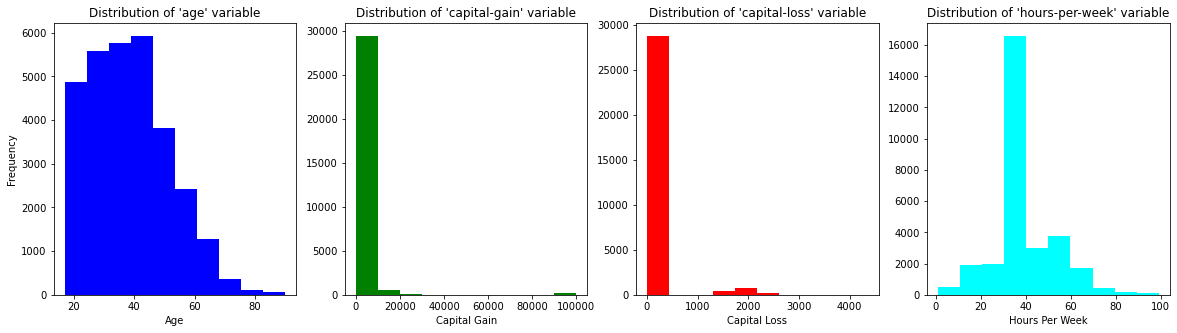

In [36]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
ax1.hist(data["age"], color='blue')
ax1.set_title("Distribution of 'age' variable")
ax1.set_xlabel("Age")
ax1.set_ylabel("Frequency")

ax2.hist(data["capital-gain"], color='green')
ax2.set_title("Distribution of 'capital-gain' variable")
ax2.set_xlabel("Capital Gain")

ax3.hist(data["capital-loss"], color='red')
ax3.set_title("Distribution of 'capital-loss' variable")
ax3.set_xlabel("Capital Loss")

ax4.hist(data["hours-per-week"], color='cyan')
ax4.set_title("Distribution of 'hours-per-week' variable")
ax4.set_xlabel("Hours Per Week")

plt.show()

<b>Note:</b> (from above Distribution plots)
<ol>
    <li>In this dataset, individuals with age less than 45 are uniformly distributed and few people having age greater than 70</li>
    <li>Most of the people having zero capital gain and very few near to 100000</li>
    <li>Some of the people having capital loss near to 2000 but most of the people having zero loss</li>
    <li>Maximum person do 35 to 40 hours per week and few of them are doing more than 80 hours per week
    </li>
</ol>

In [37]:
data.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

#### 10. Distribution of categorical variables:

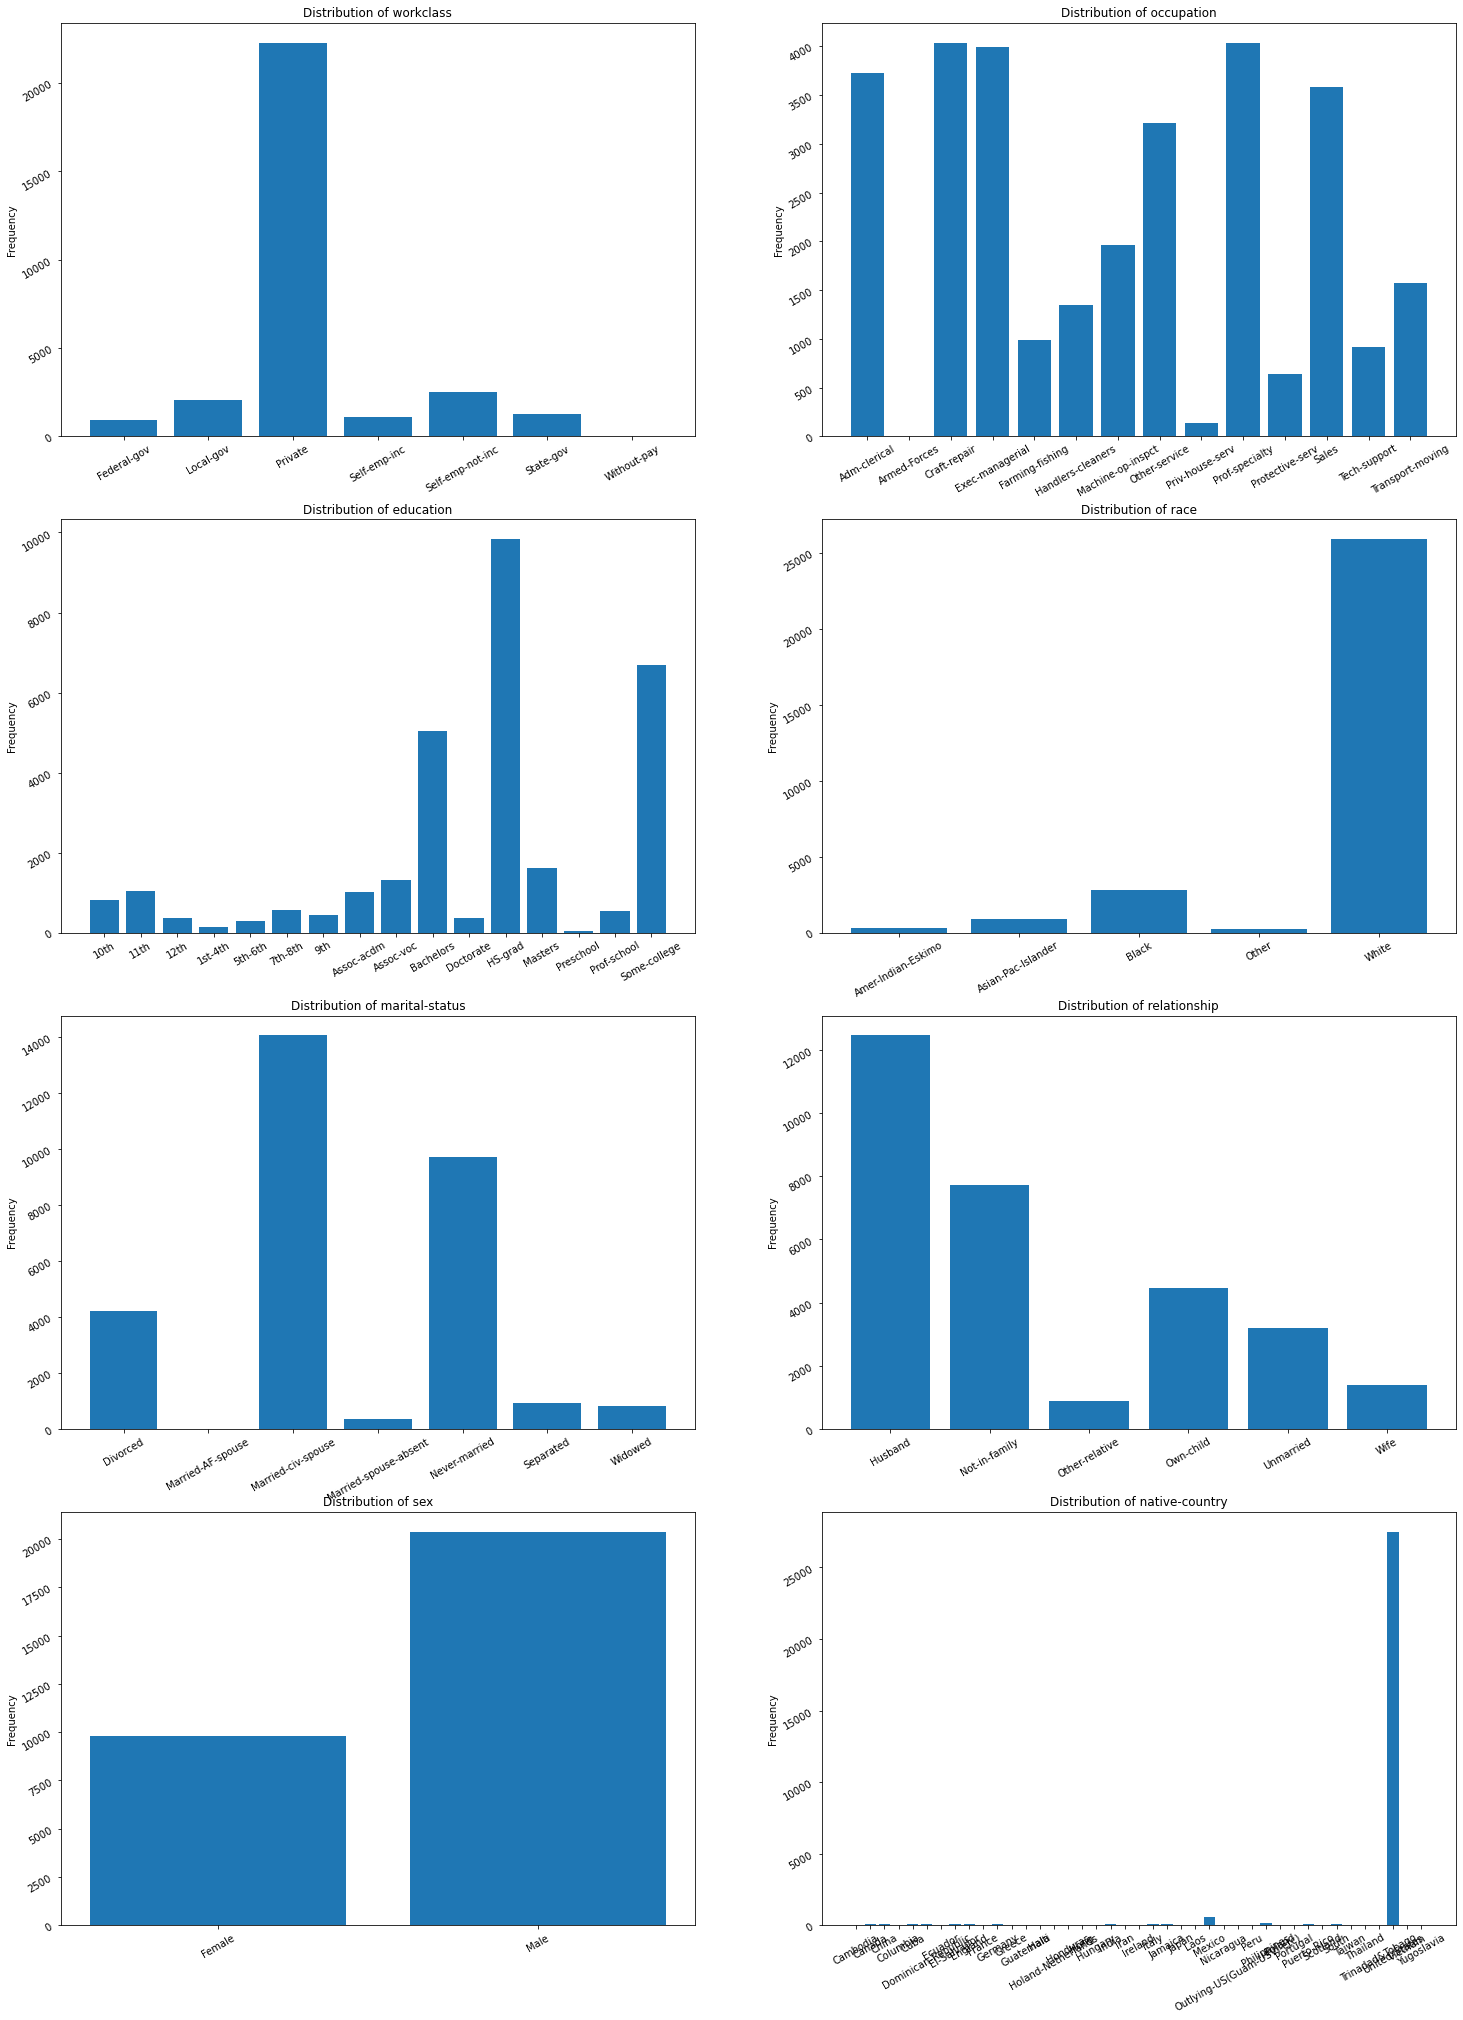

In [38]:
# categ_col = "sex"
cols = [["workclass", "occupation"], ["education", "race"], ["marital-status", "relationship"], 
        ["sex", 'native-country']
       ]
# 
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(25,35))

for i in range(4):
    for j in range(2):
        x = list(data.groupby(cols[i][j])[cols[i][j]].count().keys())
        h = list(data.groupby(cols[i][j])[cols[i][j]].count().values)
        ax[i, j].bar(x=x, height=h)
        ax[i, j].set_title("Distribution of {}".format(cols[i][j]))
        #ax[i, j].set_xlabel(cols[i][j])
        ax[i, j].set_ylabel("Frequency")
        ax[i, j].tick_params(labelrotation=30)

plt.show()

#### 11. Outliers Detection
For numerical variables

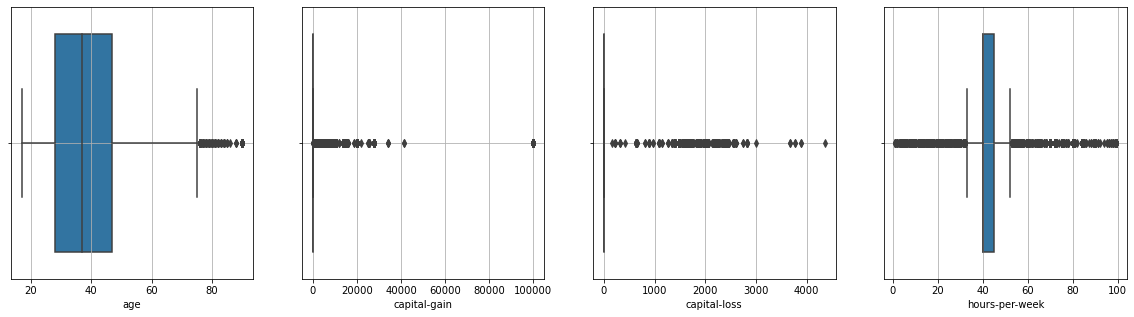

In [39]:
# using boxplot
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20,5))

# Age
sns.boxplot(x=data["age"], ax=ax1)
ax1.grid()

# Capital Gain
sns.boxplot(x=data["capital-gain"], ax=ax2)
ax2.grid()

# Capital Loss
sns.boxplot(x=data["capital-loss"], ax=ax3)
ax3.grid()

# Hours per week
sns.boxplot(x=data["hours-per-week"], ax=ax4)
ax4.grid()

plt.show()

<b>Note (from above Box Plots):</b>
<ol>
    <li>age: There are some of individuals having more than 75 years of age but we can't say it as outliers.</li>
    <li>capital-gain: Here, clearly we can see that few of the capital gain near to 100000. this can create the problem for linear model in order to predict individual's income.It is clear outlier case.</li>
    <li>capital-loss: some of the outliers present which have capital loss more than 3000</li>
</ol>

### Bi-Variate Analysis
    1. Correlation Analysis
    2. Independent Variable vs Dependent Variable

#### 1. Correlation Analysis

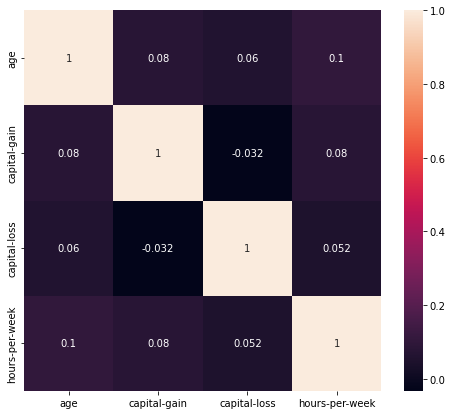

In [40]:
plt.figure(figsize=(8,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

Note: Here, None of the independent variables are correlated.

#### 2. Independent variable vs Dependent Variable

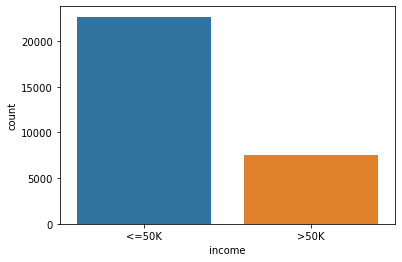

In [41]:
# Dependent Variable Proportion
income_stats = sns.countplot(x=data['income'])

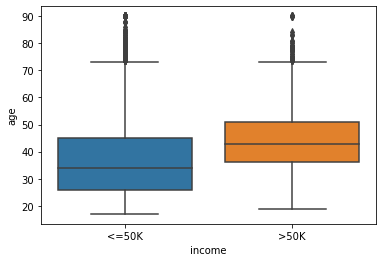

income
<=50K    34.0
>50K     43.0
Name: age, dtype: float64

In [42]:
### Box Plot - Age vs Income
sns.boxplot(x='income', y='age', data=data)
plt.show()
data.groupby('income')['age'].median()

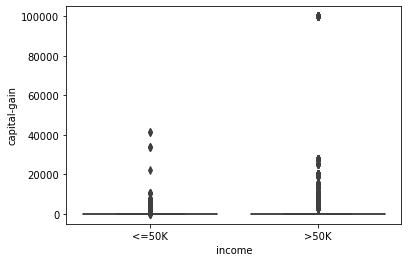

income
<=50K    0.0
>50K     0.0
Name: capital-gain, dtype: float64

In [43]:
### Box Plot - Capital Gain vs Income
sns.boxplot(x='income', y='capital-gain', data=data)
plt.show()
data.groupby('income')['capital-gain'].median()

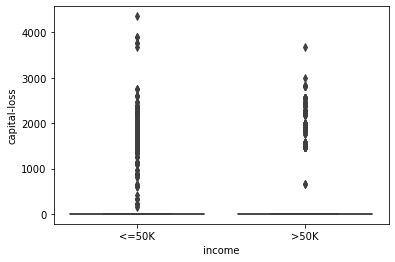

income
<=50K    0.0
>50K     0.0
Name: capital-loss, dtype: float64

In [44]:
### Box Plot - Capital Loss vs Income
sns.boxplot(x='income', y='capital-loss', data=data)
plt.show()
data.groupby('income')['capital-loss'].median()

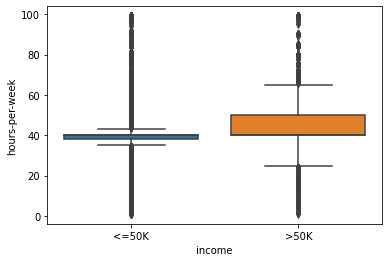

income
<=50K    40.0
>50K     40.0
Name: hours-per-week, dtype: float64

In [45]:
### Box Plot - Hours Per Week vs Income
sns.boxplot(x='income', y='hours-per-week', data=data)
plt.show()
data.groupby('income')['hours-per-week'].median()

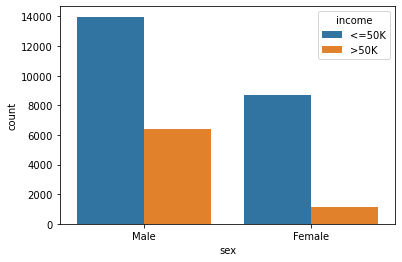

income     <=50K      >50K
sex                       
Female  0.886322  0.113678
Male    0.686163  0.313837
All     0.751078  0.248922


In [46]:
### Sex vs Income
sns.countplot(x='sex', hue='income', data=data)
plt.show()
gender_income = pd.crosstab(index=data['sex'],
                            columns=data['income'],
                            margins=True,
                            normalize='index'
                           )
print(gender_income)

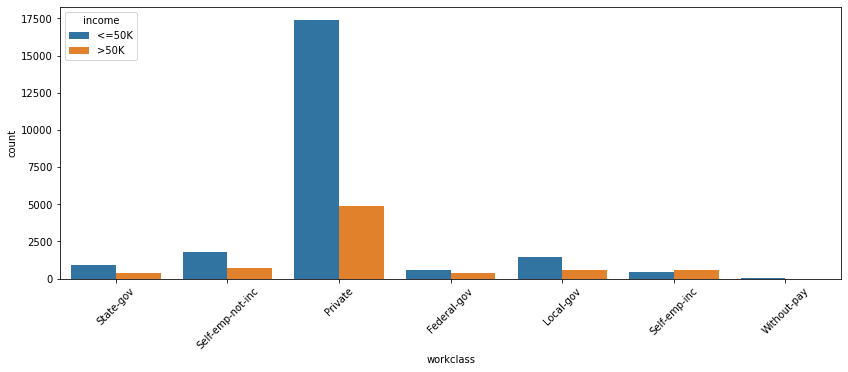

income               <=50K      >50K
workclass                           
Federal-gov       0.612937  0.387063
Local-gov         0.705370  0.294630
Private           0.781208  0.218792
Self-emp-inc      0.441341  0.558659
Self-emp-not-inc  0.714286  0.285714
State-gov         0.731040  0.268960
Without-pay       1.000000  0.000000


In [47]:
### work-class vs Income
plt.figure(figsize=(14,5))
sns.countplot(x='workclass', hue='income', data=data)
plt.xticks(rotation=45)
plt.show()
crosstable = pd.crosstab(index=data['workclass'],
                            columns=data['income'],
                            normalize='index'
                           )
print(crosstable)

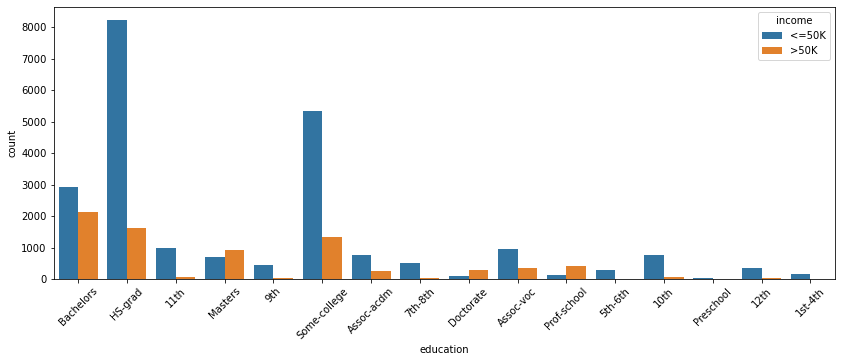

income           <=50K      >50K
education                       
10th          0.928049  0.071951
11th          0.943702  0.056298
12th          0.923077  0.076923
1st-4th       0.960265  0.039735
5th-6th       0.958333  0.041667
7th-8th       0.937163  0.062837
9th           0.945055  0.054945
Assoc-acdm    0.746032  0.253968
Assoc-voc     0.736802  0.263198
Bachelors     0.578509  0.421491
Doctorate     0.253333  0.746667
HS-grad       0.835671  0.164329
Masters       0.435771  0.564229
Preschool     1.000000  0.000000
Prof-school   0.250923  0.749077
Some-college  0.799940  0.200060


In [48]:
### education vs Income
plt.figure(figsize=(14,5))
sns.countplot(x='education', hue='income', data=data)
plt.xticks(rotation=45)
plt.show()
crosstable = pd.crosstab(index=data['education'],
                            columns=data['income'],
                            normalize='index'
                           )
print(crosstable)

### Predictive Modelling

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

#### 1. Feature Engineering and Preprocessing

In [50]:
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [51]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [52]:
# Numerical encoding of outcome variable
data['income_class'] = data['income'].map({
    '<=50K': 0, '>50K': 1
})
data = data.drop(columns=['income'])
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [53]:
# encode categorical variables
encoded_data = pd.get_dummies(data, drop_first=True)
encoded_data.head()

,age,capital-gain,capital-loss,hours-per-week,income_class,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,2174,0,40,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,50,0,0,13,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
label = ['income_class']
features = list(set(encoded_data.columns) - set(label))

In [55]:
# create input features (X) and output feature (y)
X = encoded_data[features].values
y = encoded_data[label[0]].values
X.shape, y.shape

((30162, 94), (30162,))

In [56]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(27145, 94) (3017, 94) (27145,) (3017,)


#### ML algorithms
##### 1. Logistic Regression

In [57]:
log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [58]:
# log_model.coef_, log_model.intercept_

In [59]:
y_pred = log_model.predict(X_test)
print(y_pred)

[0 0 0 ... 1 1 0]


In [60]:
print("Misclassified samples: {}".format((y_test != y_pred).sum()))

Misclassified samples: 475


In [61]:
train_y_pred = log_model.predict(X_train)
test_y_pred = log_model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_y_pred)
test_accuracy = accuracy_score(y_test, test_y_pred)
print("Train Accuracy: {}%".format(round(train_accuracy*100, 2)))
print("Test Accuracy: {}%\n".format(round(test_accuracy*100, 2)))

train_precision = precision_score(y_train, train_y_pred)
test_precision = precision_score(y_test, test_y_pred)
print("Train Precision: {}%".format(round(train_precision*100, 2)))
print("Test Precision: {}%\n".format(round(test_precision*100, 2)))

train_recall = recall_score(y_train, train_y_pred)
test_recall = recall_score(y_test, test_y_pred)
print("Train Recall: {}%".format(round(train_recall*100, 2)))
print("Test Recall: {}%\n".format(round(test_recall*100, 2)))

confusion_mat = confusion_matrix(y_test, test_y_pred)
print("Confusion Matrix: \n", confusion_mat)

Train Accuracy: 84.72%
Test Accuracy: 84.26%

Train Precision: 73.54%
Test Precision: 73.77%

Train Recall: 60.09%
Test Recall: 58.82%

Confusion Matrix: 
 [[2092  160]
 [ 315  450]]


##### 2. Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()

In [63]:
# Model tuning via hyperparameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop=300, num=3)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 15, num=3)]
# max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [3, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 5, 7]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [64]:
# Random search of parameters, using 5 fold cross validation, 
# search across 20 different combinations of hyperparameters
rfc_random = RandomizedSearchCV(estimator = rfc, 
                               param_distributions=random_grid,
                               n_iter=20, cv=5, scoring='roc_auc',
                               verbose=1, random_state=3)

# train the model
rfc_random.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [5, 10, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 7],
                                        'min_samples_split': [3, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=3, scoring='roc_auc', verbose=1)

In [65]:
print("Best Parameters: ", rfc_random.best_params_)

Best Parameters:  {'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15}


In [66]:
train_y_pred = rfc_random.predict(X_train)
test_y_pred = rfc_random.predict(X_test)

train_accuracy = accuracy_score(y_train, train_y_pred)
test_accuracy = accuracy_score(y_test, test_y_pred)
print("Train Accuracy: {}%".format(round(train_accuracy*100, 2)))
print("Test Accuracy: {}%\n".format(round(test_accuracy*100, 2)))

train_precision = precision_score(y_train, train_y_pred)
test_precision = precision_score(y_test, test_y_pred)
print("Train Precision: {}%".format(round(train_precision*100, 2)))
print("Test Precision: {}%\n".format(round(test_precision*100, 2)))

train_recall = recall_score(y_train, train_y_pred)
test_recall = recall_score(y_test, test_y_pred)
print("Train Recall: {}%".format(round(train_recall*100, 2)))
print("Test Recall: {}%\n".format(round(test_recall*100, 2)))

confusion_mat = confusion_matrix(y_test, test_y_pred)
print("Confusion Matrix: \n", confusion_mat)

Train Accuracy: 86.79%
Test Accuracy: 84.92%

Train Precision: 83.06%
Test Precision: 79.81%

Train Recall: 58.82%
Test Recall: 54.25%

Confusion Matrix: 
 [[2147  105]
 [ 350  415]]


##### 3. XGBoost Algorithm

In [67]:
#import sys
#!{sys.executable} -m pip install xgboost

In [68]:
from xgboost import XGBClassifier

In [69]:
random_grid = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25],
 "max_depth": [2, 3, 4, 5, 6, 8, 10],
 "min_child_weight": [ 1, 3, 5, 7],
 "gamma": [0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_cv = RandomizedSearchCV(xgb_model,
                            param_distributions=random_grid,
                            n_iter=20,
                            n_jobs=-1,
                            cv=5,
                            verbose=3)
xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learnin...
                                           min_child_weight=None, missing=nan,
                

In [70]:
print("Best Parameters: ", xgb_cv.best_params_)

Best Parameters:  {'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.7}


In [71]:
train_y_pred = xgb_cv.predict(X_train)
test_y_pred = xgb_cv.predict(X_test)

train_accuracy = accuracy_score(y_train, train_y_pred)
test_accuracy = accuracy_score(y_test, test_y_pred)
print("Train Accuracy: {}%".format(round(train_accuracy*100, 2)))
print("Test Accuracy: {}%\n".format(round(test_accuracy*100, 2)))

train_precision = precision_score(y_train, train_y_pred)
test_precision = precision_score(y_test, test_y_pred)
print("Train Precision: {}%".format(round(train_precision*100, 2)))
print("Test Precision: {}%\n".format(round(test_precision*100, 2)))

train_recall = recall_score(y_train, train_y_pred)
test_recall = recall_score(y_test, test_y_pred)
print("Train Recall: {}%".format(round(train_recall*100, 2)))
print("Test Recall: {}%\n".format(round(test_recall*100, 2)))

confusion_mat = confusion_matrix(y_test, test_y_pred)
print("Confusion Matrix: \n", confusion_mat)

Train Accuracy: 88.37%
Test Accuracy: 86.44%

Train Precision: 82.64%
Test Precision: 80.27%

Train Recall: 67.34%
Test Recall: 61.7%

Confusion Matrix: 
 [[2136  116]
 [ 293  472]]


#### Models Performance Analysis and Comparisons

1. ROC Score

In [72]:
## Logistic Regression
yhat = log_model.predict_proba(X_test)
log_test_prob = yhat[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(y_test, log_test_prob)
print('ROC AUC Score for Logistic Regression %.3f' % roc_auc)

## Random Forest Classifier
yhat = rfc_random.predict_proba(X_test)
rf_test_prob = yhat[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(y_test, rf_test_prob)
print('ROC AUC Score for Random Forest %.3f' % roc_auc)

## XG Boost
yhat = xgb_cv.predict_proba(X_test)
xgb_test_prob = yhat[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(y_test, xgb_test_prob)
print('ROC AUC Score for XGBoost %.3f' % roc_auc)

ROC AUC Score for Logistic Regression 0.905
ROC AUC Score for Random Forest 0.917
ROC AUC Score for XGBoost 0.931


2. Precision Recall Curve

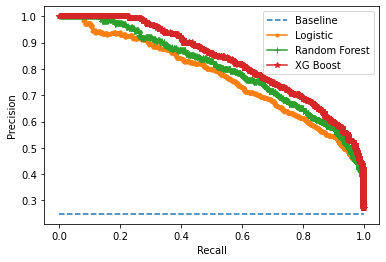

In [73]:
baseline = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
pyplot.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, log_test_prob)
# plot the model precision-recall curve
pyplot.plot(recall, precision, marker='.', label='Logistic')

# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, rf_test_prob)
# plot the model precision-recall curve
pyplot.plot(recall, precision, marker='+', label='Random Forest')

# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, xgb_test_prob)
# plot the model precision-recall curve
pyplot.plot(recall, precision, marker='*', label='XG Boost')

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

3. ROC AUC Curve

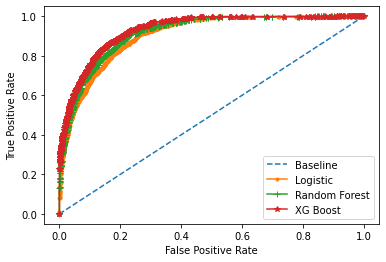

In [74]:
pyplot.plot([0, 1], [0, 1], linestyle='--', label='Baseline')
# plot model roc curve for logistic model
fpr, tpr, _ = roc_curve(y_test, log_test_prob)
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# plot model roc curve for random forest
fpr, tpr, _ = roc_curve(y_test, rf_test_prob)
pyplot.plot(fpr, tpr, marker='+', label='Random Forest')
# plot model roc curve for xgboost
fpr, tpr, _ = roc_curve(y_test, xgb_test_prob)
pyplot.plot(fpr, tpr, marker='*', label='XG Boost')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
plt.show()

<b>Note:</b> 
<ul>
    <li>Trained the Logistic Regression, Random Forest and XG Boost model on income classification dataset.</li>
    <li>According to ROC AUC score, XG Boost is outperforming among all three model with auc score with 0.93. Also, same can be confirmed with precision recall curve and ROC Curve.</li>
    <li>XGBoost is giving 86% accuracy on test set which is best among other models.</li>
</ul>